    Importando Tabela

In [48]:
pip install currencyconverter

     ------------------------------------- 573.8/573.8 kB 12.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [120]:
import pandas as pd
import numpy as np
from currency_converter import CurrencyConverter

tabela = pd.read_csv('amazon.csv')
display(tabela)

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹1.899,00","4,52",7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,"₹329,00","₹699,00","4,5",94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,"₹154,00","₹399,00","4,5",16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,"₹379,00","₹919,00",4,109,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2.279,00","₹3.045,00","4,49",4118,"230 Volts, 400 watts, 1 Year",https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2.219,00","₹3.079,00","4,51",468,International design and styling|Two heat sett...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1.399,00","₹1.889,00",4,8031,Fan sweep area: 230 MM ; Noise level: (40 - 45...,https://www.amazon.in/Havells-Ventilair-230mm-...


In [121]:
# Tratando a coluna 'actual_price' mudando de string para float

tabela['product_price'] = tabela['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
tabela['product_price'] = tabela['product_price'].astype(float)

tabela['actual_price'] = tabela['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
tabela['actual_price'] = tabela['actual_price'].astype(float)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6600\409616637.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tabela['product_price'] = tabela['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
C:\Users\Administrador\AppData\Local\Temp\ipykernel_6600\409616637.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tabela['actual_price'] = tabela['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


In [123]:
# Taxa de cambio
taxa_de_cambio = 0.06

c = CurrencyConverter()
cotacao = c.convert(1, 'INR', 'BRL')

# Calculando a coluna 'actual_price_brl' usando a taxa de cambio
tabela['actual_price_brl'] = tabela['actual_price'] * cotacao


tabela = tabela[['actual_price', 'actual_price_brl', 'product_price']]

def color_linha(val):
    if val <= 50:
        return 'background-color: lightgreen'
    elif 50 < val <= 500:
        return 'background-color: mediumseagreen'
    else:
        return 'background-color: darkgreen'

style_tabela = tabela.style.applymap(color_linha, subset=['actual_price_brl'])

style_tabela

,actual_price,actual_price_brl,product_price
0,399.000000,23.246356,1099.000000
1,199.000000,11.594047,349.000000
2,199.000000,11.594047,1899.000000
3,329.000000,19.168048,699.000000
4,154.000000,8.972278,399.000000
5,149.000000,8.680970,999.000000
6,176.630000,10.290737,499.000000
7,229.000000,13.341894,299.000000
8,499.000000,29.072511,999.000000
9,199.000000,11.594047,299.000000


In [118]:
produtos_50 = tabela[tabela['actual_price_brl'] <= 50]
produtos_50 = len(produtos_50)

produtos_50_a_500 = tabela[(tabela['actual_price_brl'] > 50) & (tabela['actual_price_brl'] <= 500)]
produtos_50_a_500 = len(produtos_50_a_500)

produtos_500 = tabela[tabela['actual_price_brl'] > 500]
produtos_500 = len(produtos_500)
                      
print(f'Produtos com valor ate 50BRL: {produtos_50}.')
print(f'produtos com o valor de 50BRL até 500BRL: {produtos_50_a_500}')
print(f'Produtos com valor acima 500BRL: {produtos_500}.')
#print(produtos_50 + produtos_500 + produtos_50_a_500)



KeyError: 'actual_price_brl'

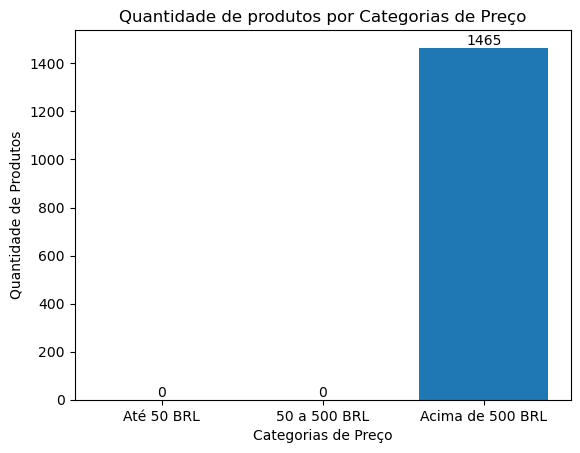

In [107]:
import matplotlib.pyplot as plt
# Vaamos criar o grafico dos valores até 50, de 50 a 500 e 500+

quantidade_ate_50 = produtos_50
quantidade_50_a_500 = produtos_50_a_500
quantidade_acima_de_500 = produtos_500

categorias = ['Até 50 BRL', '50 a 500 BRL', 'Acima de 500 BRL']
quantidades = [quantidade_ate_50, quantidade_50_a_500, quantidade_acima_de_500]

#Adiciona rotulos as barras

for i in range(len(categorias)):
    plt.text(categorias[i], quantidades[i], str(quantidades[i]), ha='center', va='bottom')

plt.bar(categoriaas, quantidades)
plt.xlabel('Categorias de Preço')
plt.ylabel('Quantidade de Produtos')
plt.title('Quantidade de produtos por Categorias de Preço')
plt.show()